In [ ]:
# Make sure that the model folders are in the PYTHONPATH
import sys
sys.path.append('../')

In [ ]:
# Import all the utilities
import os 
import torch
from IBiT.IBiT import IBiT
from VisionTransformer.ViT import ViT
from utils.device_utils import get_device
import torch.nn as nn
import matplotlib.pyplot as plt
from utils.make_datasets import return_datasets_IN

Using CUDA


In [ ]:
# Denormaliza a tensor. Used to show convert normalized image to normal image for viewing.
def denormalize(tensor, mean, std):
    """Denormalize a tensor."""
    for t, m, s in zip(tensor, mean, std):
        t.mul_(s).add_(m)
    return tensor

Using CUDA
img_h = 14 + img_w = 14
Using CUDA
1281167
torch.Size([1, 3, 197, 197]) att list shape
torch.Size([1, 3, 197, 197]) att list shape
torch.Size([1, 3, 197, 197]) att list shape
torch.Size([1, 3, 197, 197]) att list shape
torch.Size([1, 3, 197, 197]) att list shape
torch.Size([197, 197])
torch.Size([1, 197, 197])


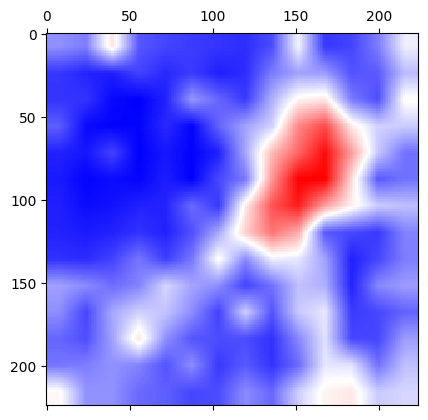

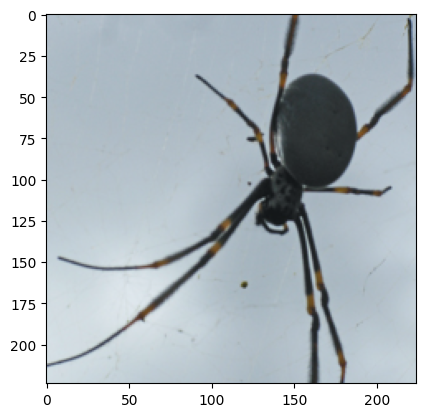

torch.Size([197, 197])
torch.Size([1, 197, 197])


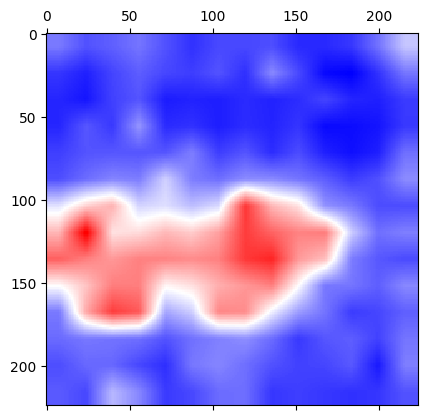

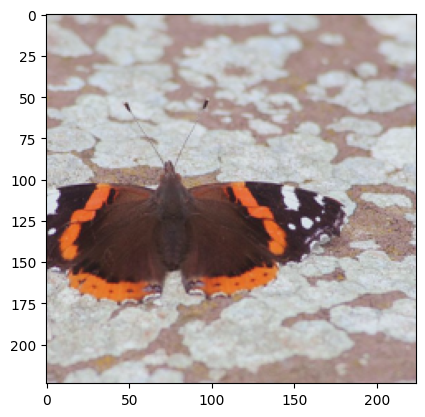

torch.Size([197, 197])
torch.Size([1, 197, 197])


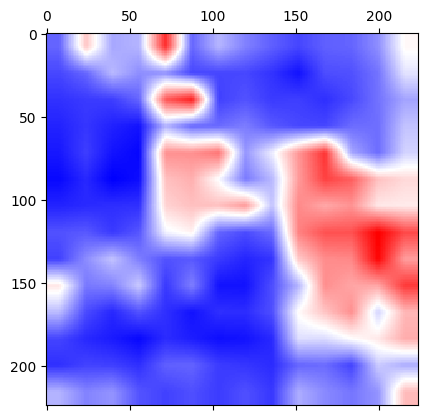

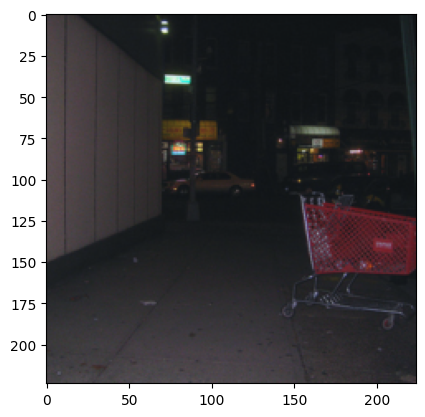

torch.Size([197, 197])
torch.Size([1, 197, 197])


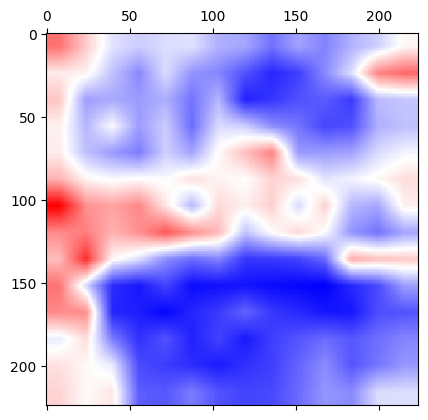

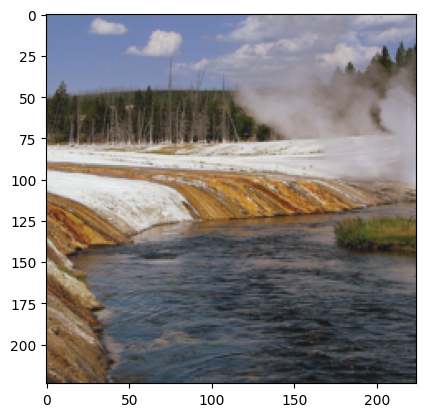

torch.Size([197, 197])
torch.Size([1, 197, 197])


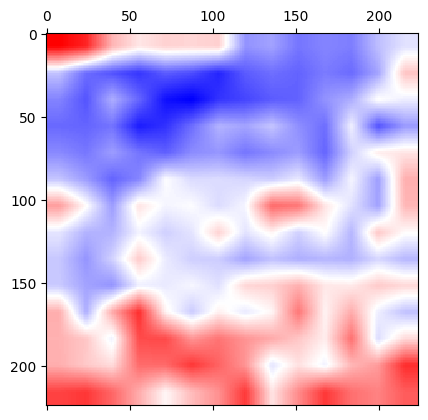

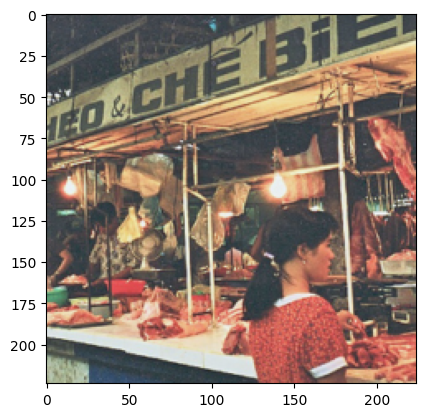

In [ ]:
# Inititalize IBiT model
IBiT_model = IBiT(img_h=224, img_w=224, patch_size=16, d_model=192, mask_fidelity=9, should_train=False, store_att=True)

# Get the most optimal device
device = get_device()

# Get Datasets and load model
IBiT_model.load_state_dict(torch.load(f'/workspace/IBiT/Repo/models/IBiTMaskFid9/model299.pt'))
IBiT_model.to(device)
CIFAR_Train, CIFAR_Val, CIFAR_Test = return_datasets_IN(size=40000, batch_size=1)
layer_cnt = 12
input_list = []

# Compute forward pass on model while storing attention maps
for i, batch in enumerate(CIFAR_Test):
    with torch.no_grad():
        inputs = batch[0]
        labels = batch[1]
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = nn.functional.softmax(IBiT_model(inputs), dim = 1)
        print(f"{IBiT_model.att_list[0].shape} att list shape")
        input_list.append(denormalize(inputs[0],mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010]))
        if i == 4:
            break

# Compute Rollout attention maps and display them       
for i in range(len(IBiT_model.att_list)//(layer_cnt)):
    att_val = torch.eye(IBiT_model.att_list[0].shape[-1], device=device)
    print(att_val.shape)
    for j in range(layer_cnt):
        inp_val = 0.5*torch.eye(IBiT_model.att_list[0].shape[-1], device=device)+0.5*torch.max(cit_model.att_list[i*layer_cnt + j], dim = 1).values
        att_val = torch.matmul(inp_val, att_val)
    print(att_val.shape)
    att_map = nn.functional.interpolate(att_val[0][0][1:].reshape(1,1,14,14), size=(224, 224), mode='bilinear').squeeze()
    plt.matshow(att_map.cpu().numpy(), cmap='bwr')
    plt.show()
    plt.imshow(input_list[i].cpu().permute(1, 2, 0).numpy())
    plt.show()      



In [ ]:
import matplotlib.pyplot as plt
with open('../models/DeitTiny/val_accuracy.txt', 'r') as r:
    txt = r.read().split(',')
    print(txt)
plt.plot([float(i) for i in txt[:-1]]),
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../models/DeitTiny/val_accuracy.txt'